## Common Libraries

In [8]:
import matplotlib.pyplot as plt
import matplotlib
params = {'axes.titlesize':'14',
          'xtick.labelsize':'14',
          'ytick.labelsize':'14',
          'font.size':'14',
          'legend.fontsize':'medium',
          'lines.linewidth':'2',
          'font.weight':'normal',
          'lines.markersize':'10'
          }
matplotlib.rcParams.update(params)
plt.rcParams["mathtext.fontset"] = "cm"
plt.rc('font', family='serif')

import time
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

## Importing Multidimensional Protocols from multi_freq_ldpy

In [2]:
from multi_freq_ldpy.mdim_freq_est.RSpFD_solution import *
from multi_freq_ldpy.mdim_freq_est.SMP_solution import *
from multi_freq_ldpy.mdim_freq_est.SPL_solution import *

## Reading MS-FIMU dataset

In [3]:
df = pd.read_csv('datasets/db_ms_fimu.csv')
df

,Gender,Age,Geolife,Visitor category,Region,Sleeping area
0,NR,NR,NR,Foreign tourist,United Kingdom,City of Belfort
1,NR,NR,NR,Foreign tourist,Germany,NR
2,NR,NR,NR,Foreign tourist,Netherlands,City of Belfort
3,NR,NR,NR,Foreign tourist,United Kingdom,NR
4,NR,NR,NR,Foreign tourist,United Kingdom,NR
...,...,...,...,...,...,...
88930,F,55-64,NR,French tourist,Rhône-Alpes,NR
88931,M,<18,rural worker,French tourist,Rhône-Alpes,Rest of Doubs
88932,F,>65,middle-class urban,French tourist,Rhône-Alpes,NR
88933,F,55-64,middle-class urban,French tourist,Rhône-Alpes,City of Belfort


## Encoding values

In [4]:
LE = LabelEncoder()

attributes = df.columns

for col in attributes:

    df[col] = LE.fit_transform(df[col])
df

,Gender,Age,Geolife,Visitor category,Region,Sleeping area
0,2,7,0,0,35,3
1,2,7,0,0,15,4
2,2,7,0,0,22,3
3,2,7,0,0,35,4
4,2,7,0,0,35,4
...,...,...,...,...,...,...
88930,0,4,0,1,30,4
88931,1,5,9,1,30,7
88932,0,6,7,1,30,4
88933,0,4,7,1,30,3


## Static Parameteres

In [5]:
# number of users
n = df.shape[0]
print('Number of Users =',n)

# number of attributes
d = len(attributes)
print('Number of Attributes =', d)

# domain size of attributes
lst_k = [len(df[att].unique()) for att in attributes]
print('Domain size of attributes =', lst_k)

print("\nPrivacy guarantees:")

# range of epsilon
lst_eps = np.arange(0.5, 5.1, 0.5)
print('Epsilon values =', lst_eps)

Number of Users = 88935
Number of Attributes = 6
Domain size of attributes = [3, 8, 12, 3, 37, 11]

Privacy guarantees:
Epsilon values = [0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]


## Comparison of multidimensional solutions with single-time protocols

In [6]:
# Real normalized frequencies
real_freq = [np.unique(df[att], return_counts=True)[-1] / n for att in attributes]

# Repeat nb_seed times since DP protocols are randomized
nb_seed = 50

# Save Averaged Mean Squared Error (MSE_avg) between real and estimated frequencies per seed
dic_avg_mse = {seed: 
                   {"SPL_ADP": [],
                   "SMP_ADP": [],
                   "RSpFD_ADP": []
                   } 
                   for seed in range(nb_seed)
              }

starttime = time.time()
for seed in range(nb_seed):
    print('Starting w/ seed:', seed)

    for eps in lst_eps:
        
        # SPL solution
        spl_reports = [SPL_ADP_Client(input_data, lst_k, d, eps) for input_data in df.values]
        spl_est_freq = SPL_ADP_Aggregator(spl_reports, lst_k, d, eps)
        dic_avg_mse[seed]["SPL_ADP"].append(np.mean([mean_squared_error(real_freq[att], spl_est_freq[att]) for att in range(d)]))

        # SMP solution
        smp_reports = [SMP_ADP_Client(input_data, lst_k, d, eps) for input_data in df.values]
        smp_est_freq = SMP_ADP_Aggregator(smp_reports, lst_k, d, eps)
        dic_avg_mse[seed]["SMP_ADP"].append(np.mean([mean_squared_error(real_freq[att], smp_est_freq[att]) for att in range(d)]))
        
        # RSpFD solution
        rspfd_reports = [RSpFD_ADP_Client(input_data, lst_k, d, eps) for input_data in df.values]
        rspfd_est_freq = RSpFD_ADP_Aggregator(rspfd_reports, lst_k, d, eps)
        dic_avg_mse[seed]["RSpFD_ADP"].append(np.mean([mean_squared_error(real_freq[att], rspfd_est_freq[att]) for att in range(d)]))
print('That took {} seconds'.format(time.time() - starttime))        

Starting w/ seed: 0
Starting w/ seed: 1
Starting w/ seed: 2
Starting w/ seed: 3
Starting w/ seed: 4
Starting w/ seed: 5
Starting w/ seed: 6
Starting w/ seed: 7
Starting w/ seed: 8
Starting w/ seed: 9
Starting w/ seed: 10
Starting w/ seed: 11
Starting w/ seed: 12
Starting w/ seed: 13
Starting w/ seed: 14
Starting w/ seed: 15
Starting w/ seed: 16
Starting w/ seed: 17
Starting w/ seed: 18
Starting w/ seed: 19
Starting w/ seed: 20
Starting w/ seed: 21
Starting w/ seed: 22
Starting w/ seed: 23
Starting w/ seed: 24
Starting w/ seed: 25
Starting w/ seed: 26
Starting w/ seed: 27
Starting w/ seed: 28
Starting w/ seed: 29
Starting w/ seed: 30
Starting w/ seed: 31
Starting w/ seed: 32
Starting w/ seed: 33
Starting w/ seed: 34
Starting w/ seed: 35
Starting w/ seed: 36
Starting w/ seed: 37
Starting w/ seed: 38
Starting w/ seed: 39
Starting w/ seed: 40
Starting w/ seed: 41
Starting w/ seed: 42
Starting w/ seed: 43
Starting w/ seed: 44
Starting w/ seed: 45
Starting w/ seed: 46
Starting w/ seed: 47
St

## Plotting metrics results

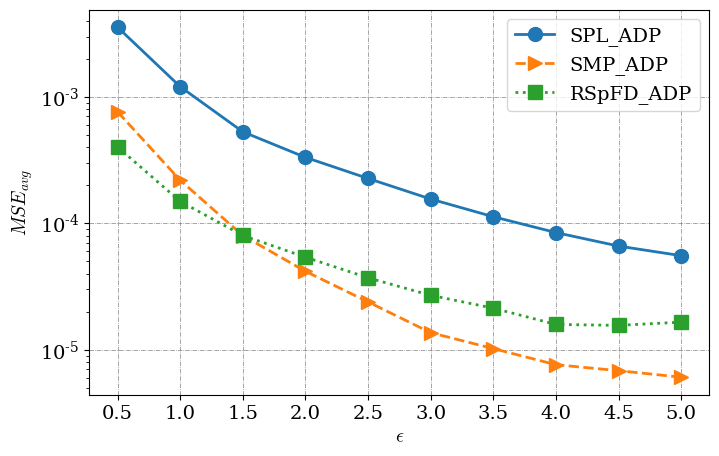

In [22]:
plt.figure(figsize=(8,5))
plt.grid(color='grey', linestyle='dashdot', linewidth=0.5)
plt.plot(np.mean([dic_avg_mse[seed]["SPL_ADP"] for seed in range(nb_seed)], axis=0), label='SPL_ADP', marker='o')
plt.plot(np.mean([dic_avg_mse[seed]["SMP_ADP"] for seed in range(nb_seed)], axis=0), label='SMP_ADP',marker='>',linestyle='dashed')
plt.plot(np.mean([dic_avg_mse[seed]["RSpFD_ADP"] for seed in range(nb_seed)], axis=0), label='RSpFD_ADP',marker='s',linestyle='dotted')

plt.yscale('log')
plt.xlabel('$\epsilon$')
plt.ylabel('$MSE_{avg}$')
plt.xticks(range(len(lst_eps)), lst_eps)
plt.legend(ncol=1)
plt.show();

## Example of Real vs Estimated Freqencies

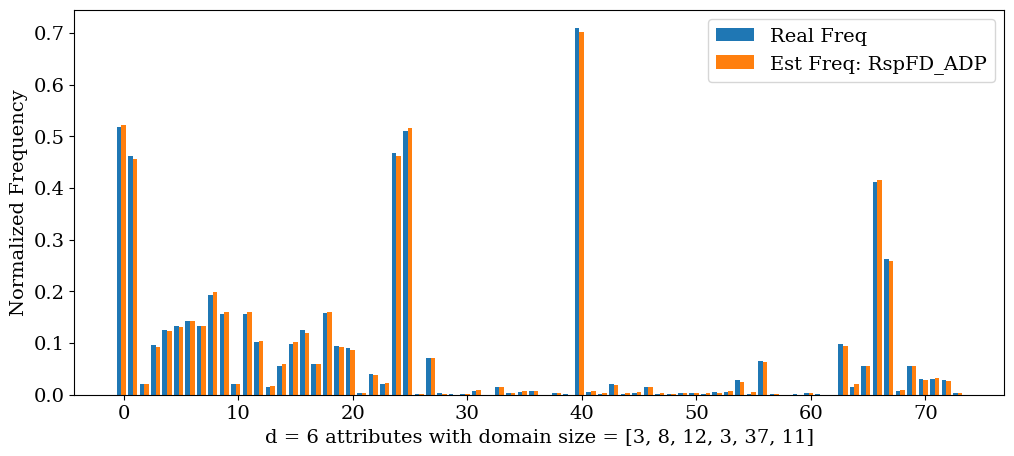

In [23]:
plt.figure(figsize=(12, 5))

barwidth = 0.4
x_axis = np.arange(sum(lst_k))

plt.bar(x_axis - barwidth, np.concatenate(real_freq), label='Real Freq', width=barwidth)
plt.bar(x_axis, np.concatenate(rspfd_est_freq), label='Est Freq: RspFD_ADP', width=barwidth)
plt.ylabel('Normalized Frequency')
plt.xlabel('d = {} attributes with domain size = {}'.format(d, lst_k))
plt.legend()
plt.show();